<a href="https://colab.research.google.com/github/r-iradukunda/Fraud-Detection-and-Prediction-for-Financial-Transactions/blob/main/Fraud_detection_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# mounting drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
Path = "/content/drive/MyDrive/Y3/Data/Fraud_detection/"

df = pd.read_csv(Path + "client_train.csv", low_memory=False)
df_1 = pd.read_csv(Path + "invoice_train.csv", low_memory=False)

df_test = pd.read_csv(Path + "client_test.csv", low_memory=False)
df_test_1 = pd.read_csv(Path + "invoice_test.csv", low_memory=False)

In [11]:
df.tail()

,disrict,client_id,client_catg,region,creation_date,target
135488,62,train_Client_99995,11,304,26/07/2004,0.0
135489,63,train_Client_99996,11,311,25/10/2012,0.0
135490,63,train_Client_99997,11,311,22/11/2011,0.0
135491,60,train_Client_99998,11,101,22/12/1993,0.0
135492,60,train_Client_99999,11,101,18/02/1986,0.0


In [12]:
df_1.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [13]:
df_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [14]:
df_test_1.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [15]:
df.shape

(135493, 6)

In [16]:
df_1.shape

(4476749, 16)

In [17]:
# Describing the data
df.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [18]:
df_1.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [21]:
df.isnull().sum()

,0
disrict,0
client_id,0
client_catg,0
region,0
creation_date,0
target,0


In [22]:
df_1.isnull().sum()

,0
client_id,0
invoice_date,0
tarif_type,0
counter_number,0
counter_statue,0
counter_code,0
reading_remarque,0
counter_coefficient,0
consommation_level_1,0
consommation_level_2,0


In [23]:
df_test.isnull().sum()

,0
disrict,0
client_id,0
client_catg,0
region,0
creation_date,0


In [24]:
df_test_1.isnull().sum()

,0
client_id,0
invoice_date,0
tarif_type,0
counter_number,0
counter_statue,0
counter_code,0
reading_remarque,0
counter_coefficient,0
consommation_level_1,0
consommation_level_2,0


In [25]:
df['target'].sum()

np.float64(7566.0)

In [26]:
# checking how many class that we have in df
df['target'].value_counts()

,count
target,
0.0,127927
1.0,7566


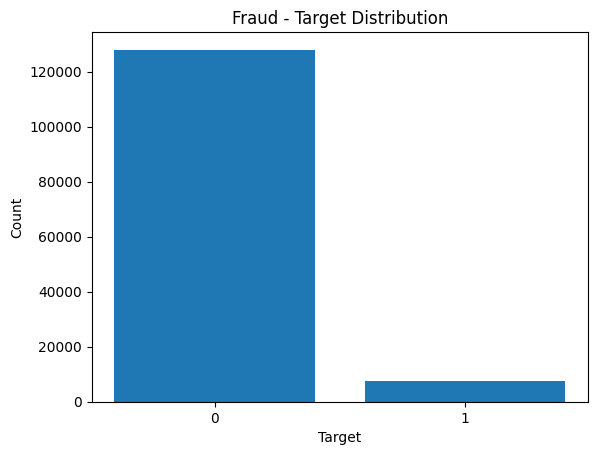

In [27]:
#Visualize fraudulent activities
fraudactivities = df.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label = [0,1])
plt.title('Fraud - Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [28]:
# From our data explanatory section, we know that invoice_date is an object type which we can change to be represented as a date_time object using pd.to_datetime:
df_1['invoice_date'] = pd.to_datetime(df_1['invoice_date'])

# testing data
df_test_1['invoice_date'] = pd.to_datetime(df_test_1['invoice_date'])

In [29]:
df_1['counter_type'] = df_1['counter_type'].astype(str)
df_1['counter_statue'] = df_1['counter_statue'].astype(str)

# testing data
df_test_1['counter_type'] = df_test_1['counter_type'].astype(str)
df_test_1['counter_statue'] = df_test_1['counter_statue'].astype(str)

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            int64         
 3   counter_number        int64         
 4   counter_statue        object        
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   int64         
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int64         
 15  counter_type          object        
dtypes: datetime64[ns](1), int64(12), object(3)
memory usage: 546.5+ MB


In [31]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_1['counter_type'] = le.fit_transform(df_1['counter_type'])
df_1['counter_statue'] = le.fit_transform(df_1['counter_statue'])

# testing data
df_test_1['counter_type'] = le.fit_transform(df_test_1['counter_type'])
df_test_1['counter_statue'] = le.fit_transform(df_test_1['counter_statue'])

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            int64         
 3   counter_number        int64         
 4   counter_statue        int64         
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   int64         
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int64         
 15  counter_type          int64         
dtypes: datetime64[ns](1), int64(14), object(1)
memory usage: 546.5+ MB


In [33]:
df['client_catg'] = df['client_catg'].astype(str)
df['disrict'] = df['disrict'].astype(str)

# testing data
df_test['client_catg'] = df_test['client_catg'].astype(str)
df_test['disrict'] = df_test['disrict'].astype(str)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  object 
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  object 
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.2+ MB


In [35]:
def aggregate_by_client_id(df):
  num_cols = df.select_dtypes(include='number').columns.tolist()
  num_cols = [col for col in num_cols if col != 'client_id']

  aggs = {col: ['mean'] for col in num_cols}

  agg_df = df.groupby('client_id').agg(aggs)
  agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
  agg_df.reset_index(inplace=True)

  # Add transaction count
  count_df = df.groupby('client_id').size().reset_index(name='transactions_count')

  return pd.merge(count_df, agg_df, on='client_id', how='left')

In [36]:
invoice_agg = aggregate_by_client_id(df_1)

# testing data
invoice_agg_test = aggregate_by_client_id(df_test_1)

In [37]:
train_data = pd.merge(df, invoice_agg, on='client_id', how='left')

# testin data
test_data = pd.merge(df_test, invoice_agg_test, on='client_id', how='left')

In [38]:
train_data.shape, test_data.shape

((135493, 21), (58069, 20))

In [39]:
train_data.head()

,disrict,client_id,client_catg,region,creation_date,target,transactions_count,tarif_type_mean,counter_number_mean,counter_statue_mean,...,reading_remarque_mean,counter_coefficient_mean,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,old_index_mean,new_index_mean,months_number_mean,counter_type_mean
0,60,train_Client_0,11,101,31/12/1994,0.0,35,11.0,1335667.0,0.0,...,6.971429,1.0,352.400000,10.571429,0.000000,0.000000,9444.542857,9807.514286,4.628571,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0,37,11.0,678902.0,0.0,...,7.216216,1.0,557.540541,0.000000,0.000000,0.000000,14330.756757,14888.297297,4.324324,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0,18,11.0,572765.0,0.0,...,7.055556,1.0,798.611111,37.888889,0.000000,0.000000,32873.000000,33709.500000,6.444444,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0,20,11.0,2078.0,0.0,...,6.150000,1.0,1.200000,0.000000,0.000000,0.000000,94.150000,95.350000,4.200000,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,11.0,19575.0,0.0,...,8.857143,1.0,663.714286,104.857143,117.357143,36.714286,6900.428571,7823.071429,3.714286,0.0


In [40]:
test_data.head()

,disrict,client_id,client_catg,region,creation_date,transactions_count,tarif_type_mean,counter_number_mean,counter_statue_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,old_index_mean,new_index_mean,months_number_mean,counter_type_mean
0,62,test_Client_0,11,307,28/05/2002,37,11.000000,6.512080e+05,0.000000,203.000000,6.810811,1.0,488.135135,3.243243,0.000000,0.000000,11389.837838,11881.216216,4.378378,0.000000
1,69,test_Client_1,11,103,06/08/2009,22,11.000000,1.747600e+05,0.045455,433.000000,7.636364,1.0,1091.409091,843.136364,182.318182,586.318182,29380.772727,32083.954545,4.545455,0.000000
2,62,test_Client_10,11,310,07/04/2004,74,23.540541,3.468089e+06,0.000000,119.648649,7.459459,1.0,554.040541,37.364865,15.743243,0.162162,11774.054054,12381.364865,4.000000,0.432432
3,60,test_Client_100,11,101,08/10/1992,40,25.500000,5.866505e+05,0.000000,104.000000,6.575000,1.0,244.350000,0.000000,0.000000,0.000000,13623.725000,13868.075000,3.900000,0.500000
4,62,test_Client_1000,11,301,21/07/1977,53,20.849057,1.614115e+06,0.094340,135.754717,7.905660,1.0,568.188679,145.056604,33.679245,0.000000,13927.471698,14676.584906,4.528302,0.339623


In [41]:
# droppingcleint_id and creation date
train_data.drop(['client_id', 'creation_date'], axis=1, inplace=True)

# testing data
test_data.drop(['client_id', 'creation_date'], axis=1, inplace=True)

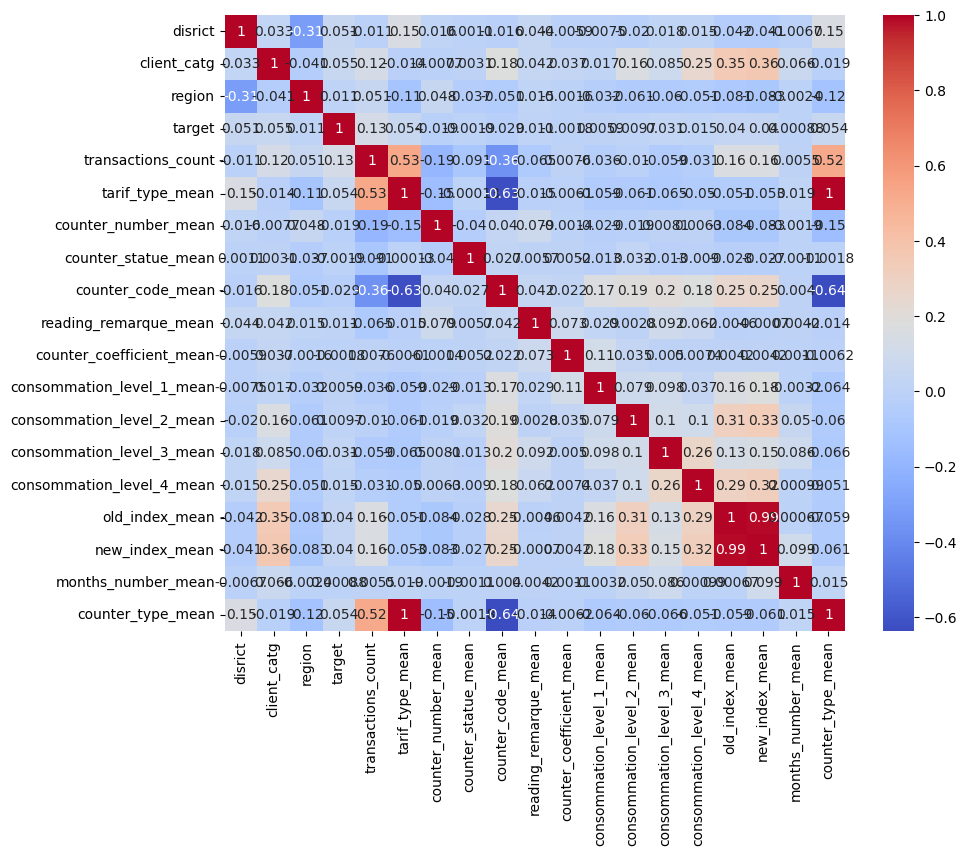

In [42]:
# let'a draw heatmap of traindata
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [43]:
train_data.shape

(135493, 19)

In [44]:
test_data.shape

(58069, 18)

In [45]:
# applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
train_data, target = smote.fit_resample(train_data, train_data['target'])

# # applying TOMEK
# from imblearn.under_sampling import TomekLinks

# tomek = TomekLinks()
# train_data, target = tomek.fit_resample(train_data, train_data['target'])

In [46]:
# splitting the data
from sklearn.model_selection import train_test_split

X = train_data.drop('target', axis=1)
y = train_data['target']

In [49]:
# Normalization of x_features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# training boost gradient model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

RF = RandomForestClassifier()

param_dist = {'n_estimators': randint(100, 400),
              'max_depth': randint(5, 15),
              'min_samples_split': randint(2, 8),
              'min_samples_leaf': randint(1, 4),
              'max_features': ['sqrt', 'log2'],
              'class_weight': ['balanced']
              }

model = RandomizedSearchCV(RF,
                          param_distributions=param_dist,
                          n_iter=10,
                          scoring='f1',
                          cv=2,
                          verbose=2,
                          n_jobs=-1,
                          random_state=42
                           )

model.fit(X_scaled, y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7defe7803da0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7defebb86a50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7deff10b5130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7defec070440>},
                   random_state=42, scoring='f1', verbose=2)

In [69]:
# Scale the numeric features in the test data
test_data_scaled = scaler.transform(test_data)

# predict
# y_pred = model.predict(test_data_scaled)
y_pred = model.predict(X_scaled)

In [72]:
# printing accuracy, f1_Score, recall
from sklearn.metrics import accuracy_score, f1_score, recall_score

print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))

Accuracy: 0.9352482275047488
F1 Score: 0.9351130537636936
Recall: 0.9331650081687213


In [73]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matric = confusion_matrix(y, y_pred)
print(conf_matric)

[[119910   8017]
 [  8550 119377]]
